# Backfire effect

Here we are creating an update function that can capture some form of *backfire effect*.
To define the function, we will consider the following points:

-  Define the *belief gap* between agents $a_i$ and $a_j$ at time $t$ as $\delta_{p}^{t}(i,j) = \left| B_p^{t}(a_i) - B_p^{t}(a_j) \right|$.
-  Define a *backfire threshold* as a value $\mathit{backfire\_threshold} \in [0,1]$.
-  When an agent $a_j$ is interacting with an agent $a_i$, the bacfire effect is triggered the agent's beliefs is too different, i.e., if 
$$
\delta_{p}^{t}(i,j) \geq \mathit{backfire\_threshold}
$$
-  If the backfire effect is trigered, agent $a_i$ won't consider $a_j$'s message in the regular way (i.e., by letting $a_j$'s belief influence $a_i$'s belief in a direct way), but rather $a_i$'s belief will get stronger in its original direction exactly because $a_j$ disagrees with $a_i$.
   To model that, we need an update function from belief value to belief value mapping $B_p^{t}(a_i) \mapsto B_p^{t+1}(a_i)$ that:
   *  Doesn't weaken $a_i$'s original belief: 
      +  if $B_p^{t}(a_i) \geq 0.5$ then $B_p^{t+1}(a_i) \geq B_p^{t}(a_i)$, and 
      +  if $B_p^{t}(a_i) \leq 0.5$ then $B_p^{t+1}(a_i) \leq B_p^{t}(a_i)$.
   These points are captured by the figure below.
   ![image](figures/backfire-motivation.png)
   This suggests the backfire update is a form of *step function*, which can be studied here [https://en.wikipedia.org/wiki/Heaviside_step_function#Analytic_approximations] for more details. But what matters is that these functions have a factor controlling how "steepy" is the step, which serves our purpose of having different levels of strenght for the backfire effect: the steeper the graph, the stronger the effect.
   *  We also want the strengthneing of $a_i$'s belief to be:
      +  more pronounced if the *belief gap* $\delta_{p}^{t}(i,j)$ is high.
         (The intuition here is that the more the person disagrees with you, the more you will fight the evidence they show to you.)
      +  is less pronounced if the influence $I(a_j,a_i)$ of agent $a_j$ on agent $a_i$ is low.     
         (The intuition here is that you more easily dismiss evidence provided by people you don't respect much.)
      This suggests that the factor controlling how steep the curve is can be:
      $$
      \mathit{backfire\_factor} = \max\left(\frac{\delta_{p}^{t}(i,j)}{I(a_j,a_i)}, \mathit{backfire\_max}\right),
      $$
      where $\mathit{backfire\_max}$ is just a cap preventing the backfire factor to go to infinity.

## Experiments with backfire function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

################################
## Parameters for saving figures
################################
## folder for saving figures
fig_folder = 'figures/backfire/'
## figure extension
fig_extension = '.pdf'

########################
## Parameters for graphs
########################
## simluation graph resolution in dpi
graph_resolution = 200
## simluation graph width
graph_size_x = 6
## simluation graph height
graph_size_y = 4

## this is the range of agent ai's original belief.
x = np.array(range(0,101))/100
#print('Range of beliefs for agent ai at time t:\n[', "%.3f "*len(x) % tuple(x), '] \n')

## this is the range of possible influences of agent aj on agent ai
ij_set = np.array(range(1,4))/3
print('Possible influences values for a fixed agent aj on our fixed agent agent ai:\n', "%.3f "*len(ij_set) % tuple(ij_set), '\n')

## this is the difference in belief from agent ai to agent aj
deltaj_set = np.array(range(0,4))/3
print('Possible absolute differences between agent aj\'s and agent ai\'s beliefs:\n', "%.3f "*len(deltaj_set) % tuple(deltaj_set), '\n')

## This transformation takes the step function from (-1,1) to (0,1)
z = (2*x)-1

factor = 1

## Plots demonstration graph of the curve we want for the backfire effect
plt.figure(dpi=graph_resolution)

#plt.title('Desired behavior for the backfire effect')
plt.xlabel('Original agent ai\'s belief')
plt.ylabel('Updated agent ai\'s belief')
    
plt.plot(x,x,label='original belief unaltered')
    
backfire_factor = 3
y = 1/(1+math.e**(-2*backfire_factor*z))
plt.plot(x,y,label='weaker backfire effect')

backfire_factor = 5
y = 1/(1+math.e**(-2*backfire_factor*z))
plt.plot(x,y,label='stronger backfire effect')

plt.legend()
fig_name = fig_folder + 'backfire-motivation' + fig_extension
plt.savefig(fig_name, bbox_inches='tight')
plt.show()

# Plots graph of 
for deltaj in deltaj_set:
    plt.figure(dpi=graph_resolution)

    plt.title('Backfire belief update for deltaj = %.3f' % deltaj)
    plt.xlabel('Original agent ai\'s belief')
    plt.ylabel('Updated agent ai\'s belief')
    
    plt.plot(x,x,label='y=x')
    
    for ij in ij_set:
        
        backfire_factor = factor*deltaj/ij    
        y = 1/(1+math.e**(-2*backfire_factor*z))
        for k in range(len(z)):
            if x[k]<=0.5:
                y[k] = min(y[k],x[k])
            else:
                y[k] = max(y[k],x[k])
        plt.plot(x,y,label='influence(j,i): %.3f' % ij)

    plt.legend()
    fig_name = fig_folder + 'backfire-motivation-delta%.3f' % deltaj + fig_extension
    plt.savefig(fig_name, bbox_inches='tight')
    plt.show()
    
# Plots graph of 
for ij in ij_set:
    plt.figure(dpi=graph_resolution)
    
    plt.title('Backfire belief update for influence(j,i) = %.3f' % ij)
    plt.xlabel('Original agent ai\'s belief')
    plt.ylabel('Updated agent ai\'s belief')
    
    plt.plot(x,x,label='y=x')
    
    for deltaj in deltaj_set:
        
        backfire_factor = factor*deltaj/ij
        y = 1/(1+math.e**(-2*backfire_factor*z))
        for k in range(len(z)):
            if x[k]<=0.5:
                y[k] = min(y[k],x[k])
            else:
                y[k] = max(y[k],x[k])
        plt.plot(x,y,label='belief gap: %.3f' % deltaj)

    plt.legend()
    fig_name = fig_folder + 'backfire-motivation-influence%.3f' % ij + fig_extension
    plt.savefig(fig_name, bbox_inches='tight')
    plt.show()


Possible influences values for a fixed agent aj on our fixed agent agent ai:
 0.333 0.667 1.000  

Possible absolute differences between agent aj's and agent ai's beliefs:
 0.000 0.333 0.667 1.000  



<Figure size 1280x960 with 1 Axes>

<Figure size 1280x960 with 1 Axes>

<Figure size 1280x960 with 1 Axes>

<Figure size 1280x960 with 1 Axes>

<Figure size 1280x960 with 1 Axes>

<Figure size 1280x960 with 1 Axes>

<Figure size 1280x960 with 1 Axes>

<Figure size 1280x960 with 1 Axes>

# Backfire effect (Resumed)

The *backfire update* of agent $a_i$'s belief given the influence with agent $a_j$ at time $t$ is formalized as

   $$
   B_p^{t+1}(a_i \mid a_j) = 
   \begin{cases}
   B_p^t(a_i) + I(a_j,a_i) \left( B_p^t(a_j) - B_p^t(a_i) \right), & \text{if $\delta_{p}^{t}(i,j) < \mathit{backfire\_threshold}$} \\
   \displaystyle \min\left(B_p^{t}(a_i),\frac{1}{1+e^{-2 \cdot \mathit{backfire\_factor} \cdot \left(2\cdot B_p^{t}(a_i) - 1\right)}}\right), & \text{if $\delta_{p}^{t}(i,j) \geq \mathit{backfire\_threshold}$ and $B_p^{t}(a_i) \leq 0.5$} \\
   \displaystyle \max\left(B_p^{t}(a_i),\frac{1}{1+e^{-2 \cdot \mathit{backfire\_factor} \cdot \left(2\cdot B_p^{t}(a_i) - 1\right)}}\right), & \text{if $\delta_{p}^{t}(i,j) \geq \mathit{backfire\_threshold}$ and $B_p^{t}(a_i) \geq 0.5$} 
   \end{cases}
   $$
   
The *overall classic update* of agent $a_i$'s belief given the influence with all other agents in $\mathcal{A}$ at time $t$ is formalized as:
   
   $$
   B_p^{t+1}(a_i) = \frac{1}{\mid\mathcal{A}\mid} \sum_{a_j \in \mathcal{A}} B_p^{t+1}(a_i \mid a_j).
   $$

In [2]:
# def Backfire_Factor(belief_ai, belief_aj, influence, backfire_max):
#     if influence == 0:
#         return backfire_max
#     else:
#         deltaij = np.abs(belief_ai-belief_aj)
#         return max(deltaj/influence, backfire_max)

def Update_1x1(belief_ai, belief_aj, influence, update_type, confbias_discount, backfire_threshold):
    # if the update type is classic...
    if update_type == 'classic':
        return belief_ai + influence * (belief_aj - belief_ai)
    # if the update type is backfire...
    if update_type == 'backfire':
        
        ## computes the absolute difference in belief between agents
        deltaij = np.abs(belief_ai-belief_aj)
        
        if deltaij >= backfire_threshold:
            
            backfire_max = 1
            ## computes the backfire factor
            if influence == 0:
                backfire_factor = backfire_max
            else:
                deltaij = np.abs(belief_ai-belief_aj)
                backfire_factor = max(deltaj/influence, backfire_max)
            
            #backfire_factor = Backfire_Factor(belief_ai, belief_aj, influence, backfire_max)
        
            ## This transformation takes the step function from (-1,1) to (0,1)
            z = (2*belief_ai)-1
                
            ## Computes the backfire update
            new_belief = 1/(1+math.e**(-2*backfire_factor*z))
            if belief_ai <= 0.5:
                new_belief = min(belief_ai, new_belief)
            else:
                new_belief = max(belief_ai, new_belief)
        else:
            new_belief = belief_ai + influence * (belief_aj - belief_ai)
            
        return new_belief
    # if the update type is not defined...
    else: 
        return 0
    
## Updates the whole belief function.
def Update_All(belief_vec, int_graph, update_type, confbias_discount, backfire_threshold):
    num_agents = len(belief_vec)
    belief_vec_new = [0] * num_agents
    for agent_i in range(0,num_agents):
        belief_vec_new[agent_i] = Update_Allx1(belief_vec, int_graph, agent_i, update_type, confbias_discount, backfire_threshold)
    return (belief_vec_new)

## Updates the belief value of one individual ai considering the effect of all other agents on him.
def Update_Allx1(belief_vec, int_graph, agent_i, update_type, confbias_discount, backfire_threshold):
    belief_ai = 0
    num_agents = len(belief_vec)
    for agent_j in range(0,num_agents):
        belief_ai += Update_1x1(belief_vec[agent_i],belief_vec[agent_j],int_graph[agent_j,agent_i], update_type, confbias_discount, backfire_threshold)
    return belief_ai / num_agents


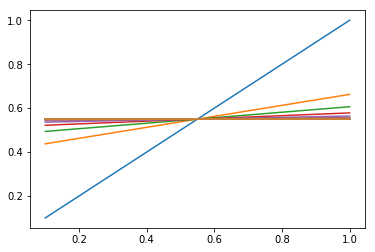

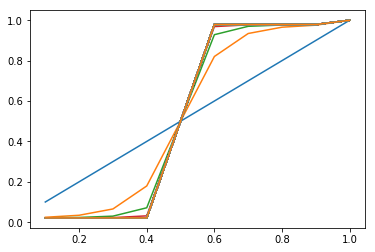

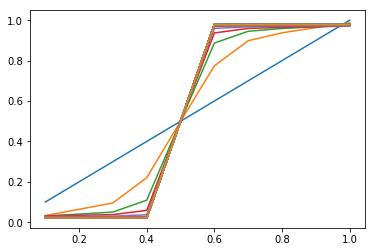

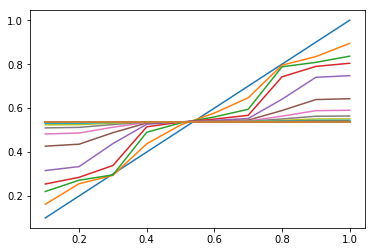

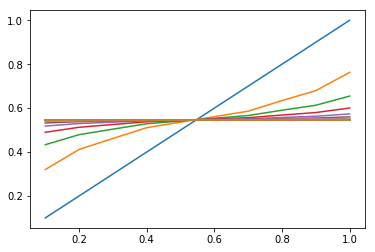

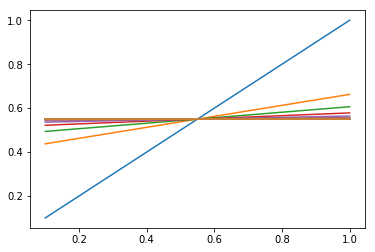

In [3]:
belief_vec_uniform10 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

int_graph_click10 = np.array([
[ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5, 0.5],
[ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5, 0.5],
[ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5, 0.5],
[ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5, 0.5],
[ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5, 0.5],
[ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5, 0.5],
[ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5, 0.5],
[ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5, 0.5],
[ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5, 0.5],
[ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5, 0.5]
])

belief_vec = belief_vec_uniform10
int_graph = int_graph_click10
confbias_discount = 0.5
backfire_threshold = 1

# r = np.array(range(1,101))/100
# rr = np.zeros(len(r))
# for kkk in range(0,len(r)):
#     rr[kkk] = Backfire_Factor(0, 0.1, r[kkk], backfire_threshold)
# plt.plot(r,rr)
# plt.show()

new_belief_vec = Update_All(belief_vec, int_graph, 'classic', confbias_discount, backfire_threshold)
plt.plot(belief_vec, belief_vec)
for i in range(0,100):
    new_belief_vec = Update_All(new_belief_vec, int_graph, 'classic', confbias_discount, backfire_threshold)
    plt.plot(belief_vec, new_belief_vec, '-')
plt.plot(belief_vec, new_belief_vec, '-')
plt.show()

backfire_threshold = 0

new_belief_vec = Update_All(belief_vec, int_graph, 'backfire', confbias_discount, backfire_threshold)
plt.plot(belief_vec, belief_vec)
for i in range(0,100):
    new_belief_vec = Update_All(new_belief_vec, int_graph, 'backfire', confbias_discount, backfire_threshold)
    plt.plot(belief_vec, new_belief_vec, '-')
plt.plot(belief_vec, new_belief_vec, '-')
plt.show()

backfire_threshold = 0.1

new_belief_vec = Update_All(belief_vec, int_graph, 'backfire', confbias_discount, backfire_threshold)
plt.plot(belief_vec, belief_vec)
for i in range(0,100):
    new_belief_vec = Update_All(new_belief_vec, int_graph, 'backfire', confbias_discount, backfire_threshold)
    plt.plot(belief_vec, new_belief_vec, '-')
plt.plot(belief_vec, new_belief_vec, '-')
plt.show()

backfire_threshold = 0.5

new_belief_vec = Update_All(belief_vec, int_graph, 'backfire', confbias_discount, backfire_threshold)
plt.plot(belief_vec, belief_vec)
for i in range(0,100):
    new_belief_vec = Update_All(new_belief_vec, int_graph, 'backfire', confbias_discount, backfire_threshold)
    plt.plot(belief_vec, new_belief_vec, '-')
plt.plot(belief_vec, new_belief_vec, '-')
plt.show()

backfire_threshold = 0.7

new_belief_vec = Update_All(belief_vec, int_graph, 'backfire', confbias_discount, backfire_threshold)
plt.plot(belief_vec, belief_vec)
for i in range(0,100):
    new_belief_vec = Update_All(new_belief_vec, int_graph, 'backfire', confbias_discount, backfire_threshold)
    plt.plot(belief_vec, new_belief_vec, '-')
plt.plot(belief_vec, new_belief_vec, '-')
plt.show()

backfire_threshold = 1

new_belief_vec = Update_All(belief_vec, int_graph, 'backfire', confbias_discount, backfire_threshold)
plt.plot(belief_vec, belief_vec)
for i in range(0,100):
    new_belief_vec = Update_All(new_belief_vec, int_graph, 'backfire', confbias_discount, backfire_threshold)
    plt.plot(belief_vec, new_belief_vec, '-')
plt.plot(belief_vec, new_belief_vec, '-')
plt.show()